In [5]:
# Cargue de Librerías básicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar tensorflow
import tensorflow as tf
print("TF version   : ", tf.__version__)

# Necesitaremos GPU
print("GPU available: ", tf.config.list_physical_devices('GPU'))

# keras version is 2.11.0
import keras
print("Keras version   : ", keras.__version__)

TF version   :  2.15.0
GPU available:  []
Keras version   :  2.15.0


In [6]:
#--------------------------------------------#
#       debido a que estoy usando COLAB      #
#--------------------------------------------#

from google.colab import drive
drive.mount('/content/drive') #/content/drive/MyDrive/pec2/data/xl.pickle
print("GPU available: ", tf.config.list_physical_devices('GPU'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU available:  []


In [7]:
import pandas as pd

home =  '/content/drive/MyDrive/TFM/'

file_path = home + "2017_2023DSTrabajo.xlsx"

dsXls = pd.read_excel(file_path)
dsXls.head(5)
dsXls.info()

####################################
# LIMPIEZA DE DATOS
####################################
#1. validar duplicados
dsXls.nunique()

#2. validar nulos, rellenar valores faltantes con la mediana
#dsXls.isnull().sum()
dsXls['Dist'].fillna(dsXls['Dist'].median(), inplace=True)
dsXls['Attendance'].fillna(dsXls['Attendance'].median(), inplace=True)
dsXls.isnull().sum()


####################################
# ESTADISTICAS
####################################
#dsXls.describe().T
dsXls.iloc[:,1:].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4092 non-null   datetime64[ns]
 1   Round       4092 non-null   object        
 2   Day         4092 non-null   object        
 3   Venue       4092 non-null   object        
 4   Result      4092 non-null   object        
 5   GF          4092 non-null   float64       
 6   GA          4092 non-null   float64       
 7   Opponent    4092 non-null   object        
 8   xG          4092 non-null   float64       
 9   xGA         4092 non-null   float64       
 10  Poss        4092 non-null   float64       
 11  Attendance  3212 non-null   float64       
 12  Season      4092 non-null   int64         
 13  Team        4092 non-null   object        
 14  Sh          4092 non-null   float64       
 15  SoT         4092 non-null   float64       
 16  Dist        4089 non-nul

,GF,GA,xG,xGA,Poss,Attendance,Season,Sh,SoT,Dist,SCA,KP,PPA,CrsPA
count,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000
mean,1.377810,1.377810,1.346163,1.346163,50.001222,36912.650049,2019.214076,12.317693,4.102884,17.675318,21.840176,9.215054,7.901760,1.869501
std,1.277631,1.277631,0.796551,0.796551,12.726702,15301.262664,1.566615,5.427259,2.437269,3.038064,9.897661,4.401972,4.553291,1.613642
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,2017.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.700000,0.700000,41.000000,29296.000000,2018.000000,8.000000,2.000000,15.700000,14.000000,6.000000,5.000000,1.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,32092.500000,2019.000000,12.000000,4.000000,17.600000,21.000000,9.000000,7.000000,2.000000
75%,2.000000,2.000000,1.800000,1.800000,59.000000,51237.000000,2021.000000,16.000000,6.000000,19.500000,28.000000,12.000000,10.000000,3.000000
max,9.000000,9.000000,5.900000,5.900000,82.000000,83222.000000,2022.000000,36.000000,15.000000,35.000000,66.000000,34.000000,33.000000,12.000000


In [8]:
#APLICAR PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preparando los datos para PCA, excluyendo columnas no numéricas y la variable objetivo 'Result'
features = dsXls.select_dtypes(include=[np.number])

# Normalizando los datos antes de aplicar PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicando PCA
pca = PCA(n_components=0.95)  # Conservar el 95% de la varianza explicada
principal_components = pca.fit_transform(features_scaled)

# Porcentaje de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Creando un DataFrame para los resultados de PCA
pca_results = pd.DataFrame({
    'Componente': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

print(pca_results)
print("Número de componentes principales:", principal_components.shape[1])

   Componente  Explained Variance  Cumulative Variance
0           1            0.404537             0.404537
1           2            0.100658             0.505195
2           3            0.099203             0.604398
3           4            0.080980             0.685378
4           5            0.070068             0.755446
5           6            0.066543             0.821989
6           7            0.044109             0.866098
7           8            0.041575             0.907673
8           9            0.025706             0.933379
9          10            0.024218             0.957597
Número de componentes principales: 10


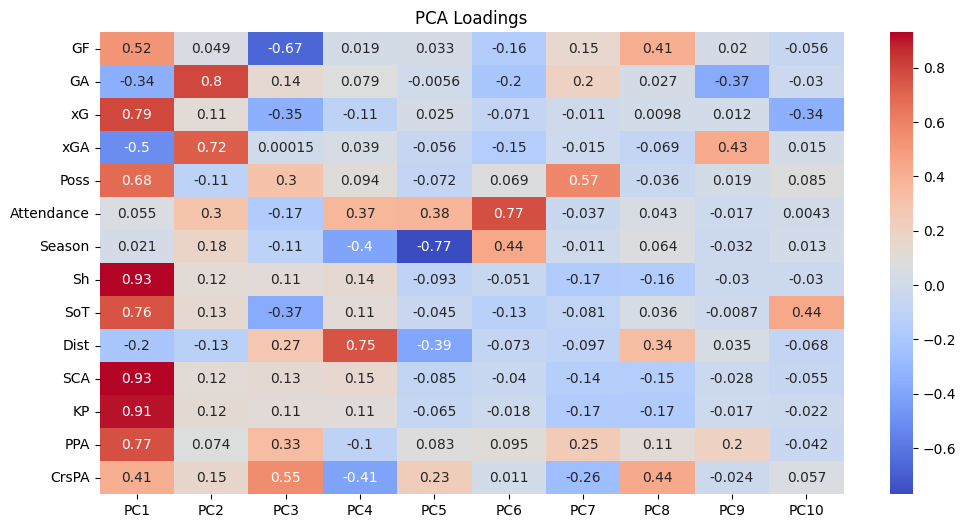

                 PC1       PC2       PC3       PC4       PC5       PC6  \
GF          0.518957  0.048783 -0.666046  0.018556  0.033161 -0.161368   
GA         -0.340169  0.797295  0.136528  0.079332 -0.005586 -0.204991   
xG          0.794587  0.114307 -0.351056 -0.105445  0.025049 -0.070701   
xGA        -0.504854  0.720574  0.000147  0.038831 -0.055531 -0.152533   
Poss        0.684264 -0.112295  0.302805  0.094130 -0.072134  0.069099   
Attendance  0.055375  0.297137 -0.168285  0.370409  0.376225  0.772818   
Season      0.021273  0.178692 -0.108585 -0.399230 -0.770466  0.444412   
Sh          0.925240  0.116836  0.110905  0.139268 -0.093101 -0.050760   
SoT         0.757153  0.133350 -0.368912  0.107265 -0.045426 -0.130394   
Dist       -0.203574 -0.130605  0.274611  0.754660 -0.394007 -0.072572   
SCA         0.930257  0.116548  0.132500  0.147059 -0.085477 -0.039803   
KP          0.908465  0.122749  0.111658  0.105117 -0.064749 -0.017976   
PPA         0.770612  0.073877  0.3342

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# features es el DataFrame de variables numéricas
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicando PCA conservando primeros 10 componentes
pca = PCA(n_components=10)
principal_components = pca.fit_transform(features_scaled)

# Cargando la matriz
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Creando un DataFrame para visualizar mejor los loadings
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=features.columns)

# Visualizando los loadings para las primeras cinco componentes
plt.figure(figsize=(12, 6))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm')
plt.title('PCA Loadings')
plt.show()

# Imprimiendo los loadings
print(loading_matrix)

    Component  Explained Variance (%)
0           1               40.453701
1           2               10.065772
2           3                9.920342
3           4                8.097951
4           5                7.006828
5           6                6.654295
6           7                4.410897
7           8                4.157499
8           9                2.570607
9          10                2.421779
10         11                1.917171
11         12                1.672561
12         13                0.512914
13         14                0.137685


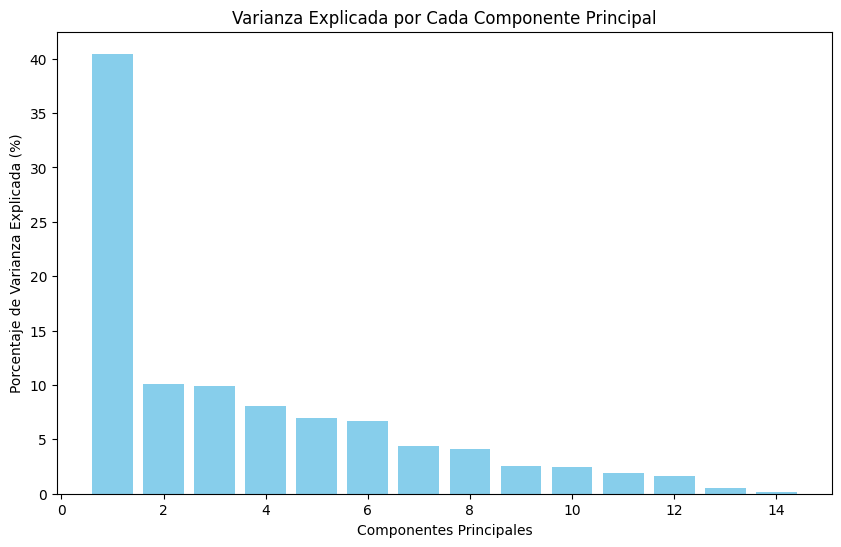

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Estandarizando los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicando PCA
pca = PCA()
principal_components = pca.fit(features_scaled)

# Obteniendo la varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_

# Convirtiendo la varianza explicada en porcentaje
explained_variance_percent = explained_variance_ratio * 100

# Creando un DataFrame para visualizar la varianza explicada por cada componente
variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance_percent) + 1),
    'Explained Variance (%)': explained_variance_percent
})

print(variance_df)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(variance_df['Component'], variance_df['Explained Variance (%)'], color='skyblue')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada (%)')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.show()

Accuracy: 0.8192918192918193


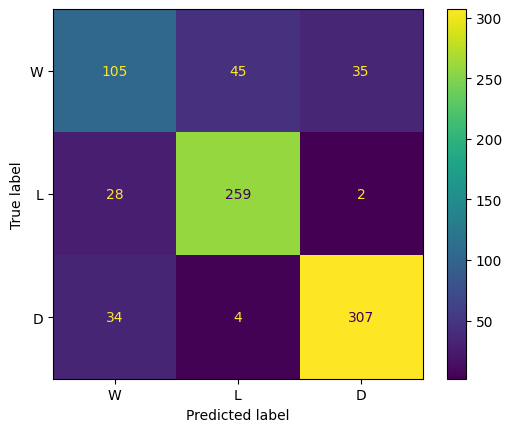

Classification Report:
               precision    recall  f1-score   support

           D       0.63      0.57      0.60       185
           L       0.84      0.90      0.87       289
           W       0.89      0.89      0.89       345

    accuracy                           0.82       819
   macro avg       0.79      0.78      0.79       819
weighted avg       0.81      0.82      0.82       819

Cross-validated Accuracy: 0.8105947131424838


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score


#y = dsXls['Result']
#X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



X = features_scaled
y = dsXls['Result']

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = pca.fit_transform(X)   #scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo KNN con distancia Euclidiana
knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
#10 0.7851037851037851
#8 0.7924297924297924
#5 0.7887667887667887
#2 0.7081807081807082

# Entrenar el modelo
knn.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# debido a que y_pred y y_test definidos
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['W','L','D'])
disp.plot()
plt.show()

# Reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred))

# Validación cruzada
cross_val_accuracy = cross_val_score(knn, X_scaled, y, cv=13, scoring='accuracy')
print("Cross-validated Accuracy:", cross_val_accuracy.mean())
